![](itd.png)

    
# Análisis de Datos Masivos
## Visualización de Datos 2
## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre del alumno
### Calos Alberto Carrete Gómez

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_canada = pd.read_excel('Canada.xlsx', 
                     sheet_name='Canada by Citizenship',
                     skiprows = range(20), 
                     skipfooter=2)  
df_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [3]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

### Gráficos de dispersión (Scatter)

In [10]:
years = list(map(int,range(1980,2014)))
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))
df_tot.head()
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns=['Año','Total']

In [8]:
df_tot.head()

,Año,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


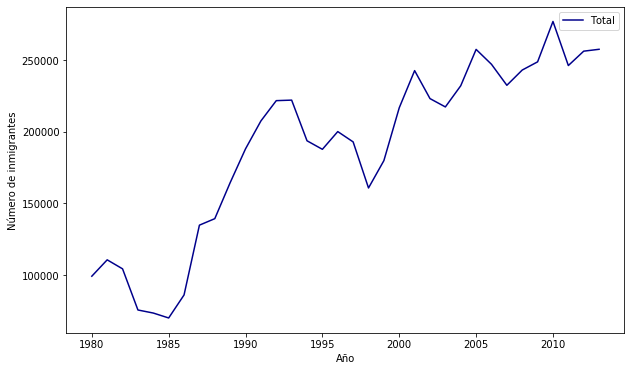

In [13]:
df_tot.plot(x='Año',y='Total', figsize=(10,6), color='darkblue')
plt.title = ('Total de inmigración a Canada de 1980 a 2013')
plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')
plt.show()

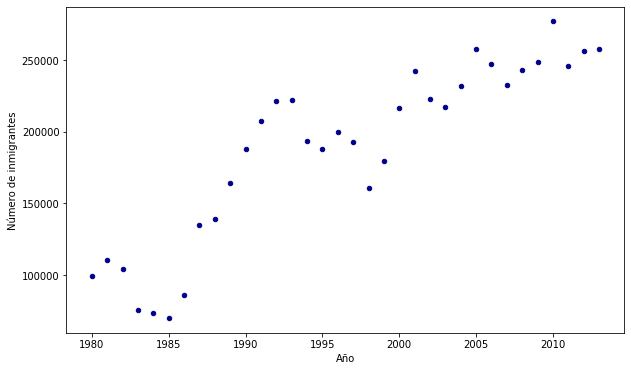

In [14]:
df_tot.plot(kind='scatter',x='Año',y='Total', figsize=(10,6), color='darkblue')
plt.title = ('Total de inmigración a Canada de 1980 a 2013')
plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')
plt.show()

#### Obtener la linea de mejor ajuste para la linea de regresión
`x`= Coordenadas x de los datos <br>
`y` = Coordenadas y de los datos <br>
`deg` = Grado de ajuste del polinomio, 1= Lineal, 2= Cuadrático

In [17]:
x = df_tot['Año']
y = df_tot['Total']
fit = np.polyfit(x,y,deg=1)

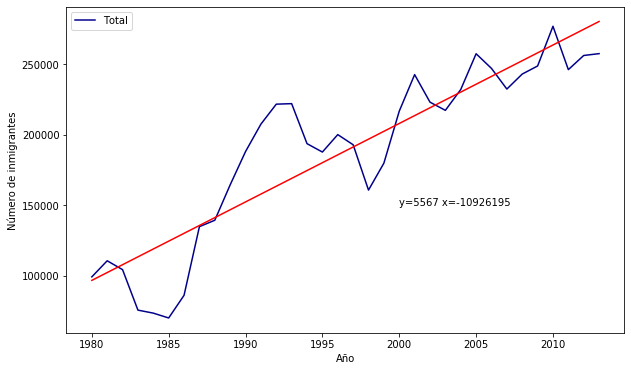

In [21]:
df_tot.plot(x='Año',y='Total', figsize=(10,6), color='darkblue')
plt.title = ('Total de inmigración a Canada de 1980 a 2013')
plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')
plt.plot(x,fit[0]*x+fit[1],'red')
plt.annotate('y={0:.0f} x={1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

### Gráfico de Burbujas (Burble)

In [28]:
df_canada_t = df_canada.set_index('OdName',inplace = True)
df_canada_t = df_canada[years].transpose()
df_canada_t.index = map(int,df_canada_t.index)
df_canada_t.index.name = 'Year'
df_canada_t.reset_index(inplace=True)
df_canada_t.head()

OdName,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [42]:
#Proceso de normalización de datos
norm_mexico = (df_canada_t['Mexico'] - df_canada_t['Mexico'].min())/(df_canada_t['Mexico'].max() - df_canada_t['Mexico'].min() )
norm_argentina = (df_canada_t['Argentina'] - df_canada_t['Argentina'].min())/(df_canada_t['Argentina'].max() - df_canada_t['Argentina'].min() )
norm_brazil = (df_canada_t['Brazil'] - df_canada_t['Brazil'].min())/(df_canada_t['Brazil'].max() - df_canada_t['Brazil'].min() )

In [36]:
norm_argentina.head(2)

0    0.111039
1    0.148483
Name: Argentina, dtype: float64

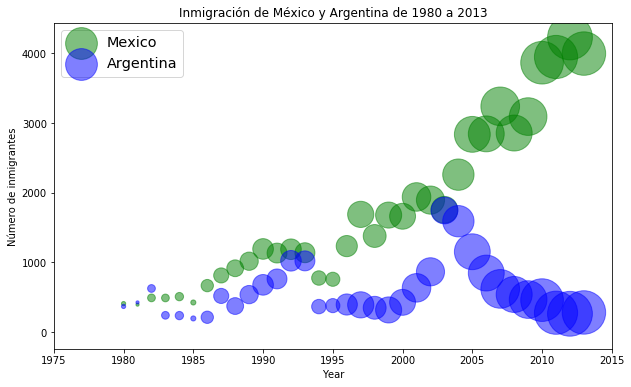

In [44]:
ax0 = df_canada_t.plot(kind='scatter', x = 'Year', y='Mexico', figsize=(10,6), alpha=0.5,
                  color='green',s = norm_mexico*2000+10,
                  xlim=(1975,2015))
ax1 = df_canada_t.plot(kind='scatter', x = 'Year', y='Argentina', alpha=0.5,
                  color='blue',s = norm_mexico*2000+10, ax=ax0)
#ax2 = df_canada_t.plot(kind='scatter', x = 'Year', y='Brazil', alpha=0.5,
#                  color='red',s = norm_brazil*2000+10, ax=ax0)
ax0.set_ylabel('Número de inmigrantes')
ax0.set_title('Inmigración de México y Argentina de 1980 a 2013')
ax0.legend(['Mexico','Argentina'], loc='upper left', fontsize='x-large')